<a href="https://colab.research.google.com/github/MattIzon/16010269_DataAnalytics/blob/main/LR/model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model 3
Predictors: day_of_week (mon 1 - sun 7), temp

In [1]:
# Set-up
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/MattIzon/16010269_DataAnalytics/main/LR/LR3.csv')

In [3]:
randomised = data.iloc[np.random.permutation(len(data))]

In [4]:
predictors = randomised.iloc[:,0:2]
targets = randomised.iloc[:,2]
train_size = int(len(randomised)*0.8)
qty_predictors = 2
qty_targets = 1

In [5]:
# Design model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(qty_targets, input_shape=[qty_predictors]))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))


In [6]:
# View model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train model
history = model.fit(predictors.iloc[0:train_size], targets.iloc[0:train_size], epochs=250)

Epoch 1/250
44/44 [==============================] - 1s 2ms/step - loss: 97.6309
Epoch 2/250
44/44 [==============================] - 0s 2ms/step - loss: 6.3333
Epoch 3/250
44/44 [==============================] - 0s 1ms/step - loss: 4.8388
Epoch 4/250
44/44 [==============================] - 0s 2ms/step - loss: 3.7601
Epoch 5/250
44/44 [==============================] - 0s 2ms/step - loss: 2.7667
Epoch 6/250
44/44 [==============================] - 0s 2ms/step - loss: 1.9618
Epoch 7/250
44/44 [==============================] - 0s 2ms/step - loss: 1.3458
Epoch 8/250
44/44 [==============================] - 0s 2ms/step - loss: 0.8868
Epoch 9/250
44/44 [==============================] - 0s 2ms/step - loss: 0.5722
Epoch 10/250
44/44 [==============================] - 0s 2ms/step - loss: 0.3601
Epoch 11/250
44/44 [==============================] - 0s 2ms/step - loss: 0.2221
Epoch 12/250
44/44 [==============================] - 0s 1ms/step - loss: 0.1365
Epoch 13/250
44/44 [================

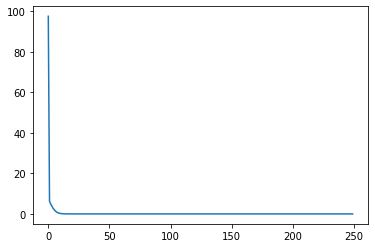

In [8]:
# View training history
plt.plot(history.history['loss'])

In [9]:
# Test model
model_test = model.predict(predictors.iloc[train_size:])

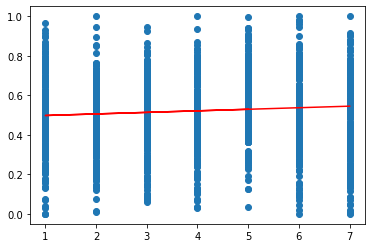

In [ ]:
# View model line vs data 
plt.scatter(predictors.iloc[0:train_size], targets.iloc[0:train_size])
plt.plot(predictors.iloc[train_size:], model_test, color='r')
plt.show()

In [10]:
# Analyse model quality vs mean 
rmse = np.sqrt(np.mean((targets[train_size:].values - model_test)**2))
print('LinearRegression has RMSE of {0}'.format(rmse));

avg = np.mean(data['crime_count'][:train_size])

rmse = np.sqrt(np.mean((targets[train_size:].values - avg)**2))
print('Using the training data mean of {0} would have has resulted in a RMSE of {1}'.format(avg, rmse));

LinearRegression has RMSE of 0.2526201776427652
Using the training data mean of 0.5080399258596116 would have has resulted in a RMSE of 0.20541830997939645
